# 타이타닉 우주선

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 가져오기

In [101]:
train = pd.read_csv('./spaceship-titanic/train.csv') # 훈련 데이터
test = pd.read_csv('./spaceship-titanic/test.csv') # 테스트 데이터
submission = pd.read_csv('./spaceship-titanic/sample_submission.csv') # 제출 샘플 데이터

## 데이터 훑어보기

In [102]:
train.shape, test.shape

((8693, 14), (4277, 13))

In [103]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [104]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [105]:
submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [106]:
test.info()  #운송정보없음(승객이 다른 차원으로 이동했는지 여부. 이 문제의 타겟, 예측해야할 목표.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [107]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [108]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


- PassengerId - 각 승객의 고유 ID
- HomePlanet - 승객이 출발한 행성 (승객의 고향)
- CryoSleep - 승객의 냉동수면 여부 CyroSleep 중인 승객은 객실에 갇혀 있음
- Cabin - 객실 번호 (deck/num/side), side → Port=P(좌현), Starboard=S(우현)
- Destination - 승객의 목적지
- Age - 승객의 나이
- VIP - VIP 여부
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - 승객이 각종 편의시설에 대해 지불한 금액
- Name - 승객의 이름
- Transported - 승객이 다른 차원으로 이동했는지 여부. 이 문제의 타겟, 예측해야할 목표.

## 분석

**범주형 데이터 탐색**

In [109]:
train.describe(include=['O']) 

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [110]:
train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [111]:
train.Transported.value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [112]:
train['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [113]:
train['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [114]:
train['Cabin'].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [115]:
train['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [116]:
train['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

**수치형 데이터 탐색**

In [117]:
train.describe() 

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


**수치형 특성별 히스토그램**

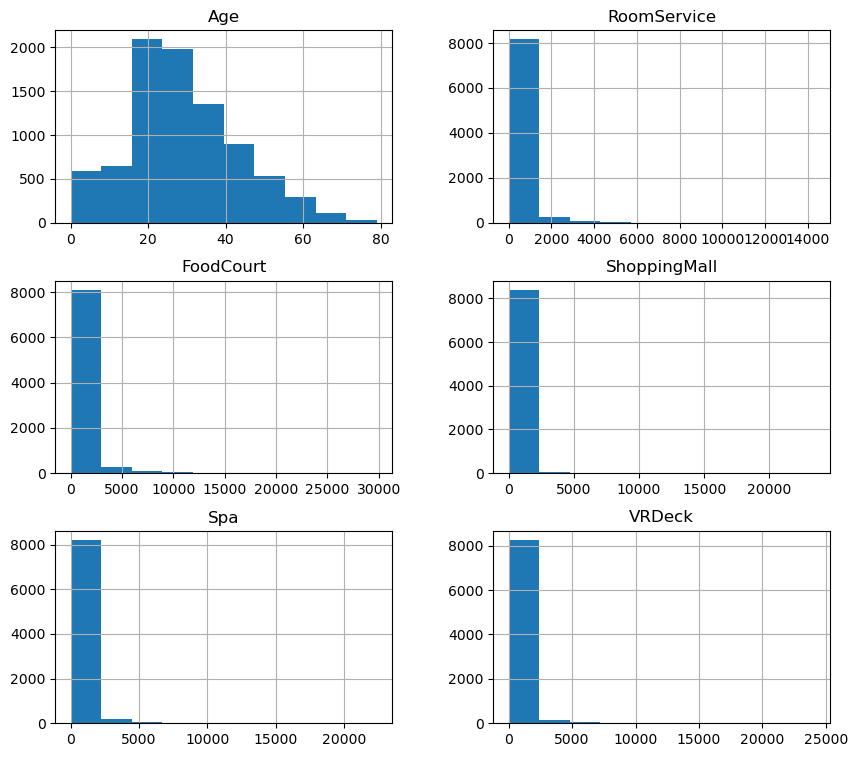

In [118]:
train.hist(figsize=(10, 9))
plt.show()

#### 특성별 운송정보 확인

**냉동 수면과 운송여부의 관계**

In [119]:
train.groupby('CryoSleep').mean()['Transported']  

CryoSleep
False    0.328921
True     0.817583
Name: Transported, dtype: float64

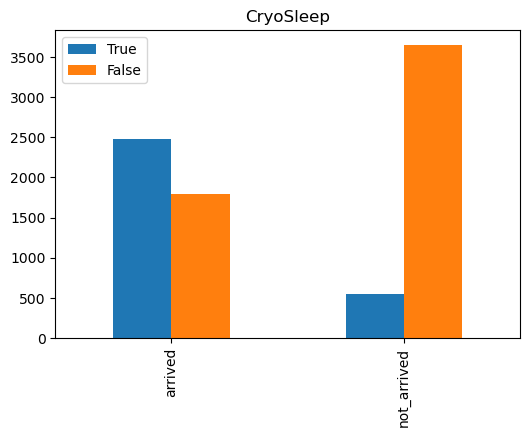

In [120]:
train[['CryoSleep', 'Transported']].groupby(['CryoSleep'], as_index=False).mean().sort_values(by='Transported')

arrived = train[train['Transported'] == 1]['CryoSleep']. value_counts()
not_arrived = train[train['Transported'] == 0]['CryoSleep']. value_counts()
df = pd. DataFrame([arrived, not_arrived])
df. index = ['arrived','not_arrived']
df. plot(kind= 'bar',stacked= False, figsize= (6,4))
plt.title('CryoSleep')
plt. show()

- CrtoSleep를 하지 않은사람들이 많지만 한사람의 80%가 도착했기때문에 어느정도의 관계가 있다고 보여진다

**VIP와 운송여부의 관계**

In [121]:
train.groupby('VIP').mean()['Transported']

VIP
False    0.506332
True     0.381910
Name: Transported, dtype: float64

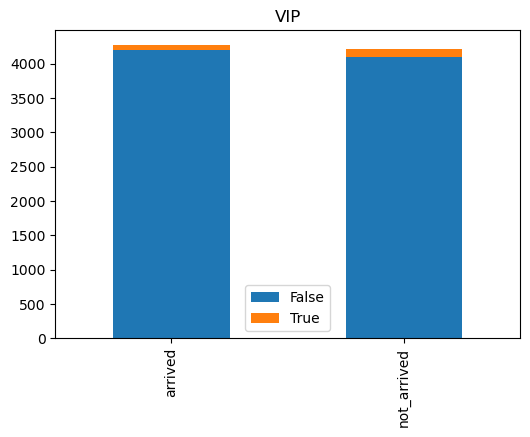

In [122]:
train[['VIP', 'Transported']].groupby(['VIP'], as_index=False).mean().sort_values(by='Transported')

arrived = train[train['Transported'] == 1]['VIP']. value_counts()
not_arrived = train[train['Transported'] == 0]['VIP']. value_counts()
df = pd. DataFrame([arrived, not_arrived])
df. index = ['arrived','not_arrived']
df. plot(kind= 'bar',stacked= True , figsize= (6,4))
plt.title('VIP')
plt. show()

- VIP를 신청한사람중 38%가 도착했고 신청하지 않은 사람의 50%가 도착했지만 VIP를 신청한 사람의 비율이 매우낮다.

**출발행성과 도착여부의 관계**

In [123]:
train[['HomePlanet', 'Transported']].groupby(['HomePlanet'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,HomePlanet,Transported
1,Europa,0.658846
2,Mars,0.523024
0,Earth,0.423946


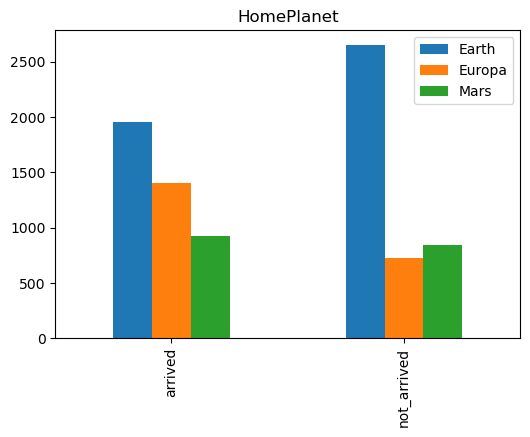

In [124]:
train[['HomePlanet', 'Transported']].groupby(['HomePlanet'], as_index=False).mean().sort_values(by='Transported')

arrived = train[train['Transported'] == 1]['HomePlanet']. value_counts()
not_arrived = train[train['Transported'] == 0]['HomePlanet']. value_counts()
df = pd. DataFrame([arrived, not_arrived])
df. index = ['arrived','not_arrived']
df. plot(kind= 'bar',stacked= False , figsize= (6,4))
plt.title('HomePlanet')
plt. show()

**목적지와 도착여부의 관계**

In [125]:
train[['Destination', 'Transported']].groupby(['Destination'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,Destination,Transported
0,55 Cancri e,0.610000
1,PSO J318.5-22,0.503769
2,TRAPPIST-1e,0.471175


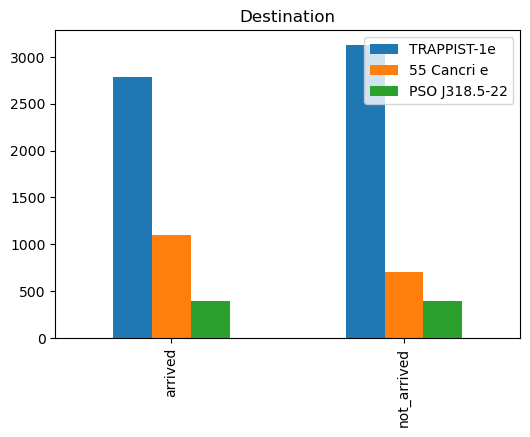

In [126]:
train[['Destination', 'Transported']].groupby(['Destination'], as_index=False).mean().sort_values(by='Transported')

arrived = train[train['Transported'] == 1]['Destination']. value_counts()
not_arrived = train[train['Transported'] == 0]['Destination']. value_counts()
df = pd. DataFrame([arrived, not_arrived])
df. index = ['arrived','not_arrived']
df. plot(kind= 'bar',stacked= False , figsize= (6,4))
plt.title('Destination')
plt. show()

### 연령대별 분류

**탑승자들의 연령**

<AxesSubplot:>

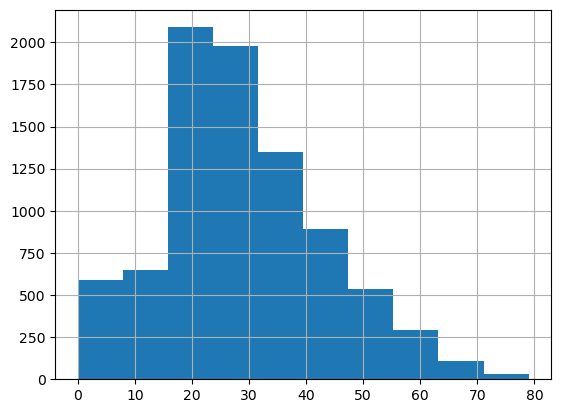

In [127]:
train['Age'].hist(bins=10)

**연령별 도착여부의 관계**

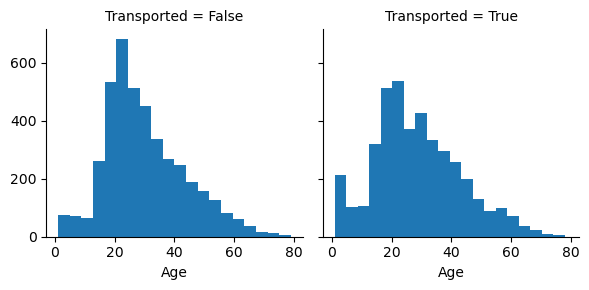

In [128]:
g = sns.FacetGrid(train[train['Age'] > 0], col='Transported')
g.map(plt.hist, 'Age', bins=20)   

**연령별 목적지**

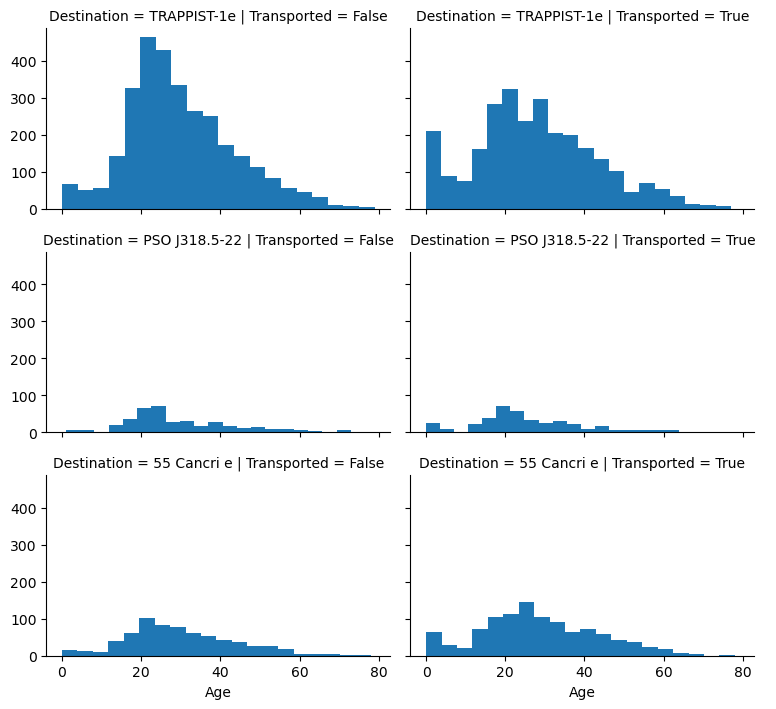

In [129]:
grid = sns.FacetGrid(train, col='Transported', row='Destination', height=2.4, aspect=1.6)
grid.map(plt.hist, 'Age', bins=20)
grid.add_legend()   

**목적지별 vip와 도착여부**

C:\Users\seok9\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\seok9\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\seok9\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\seok9\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\seok9\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


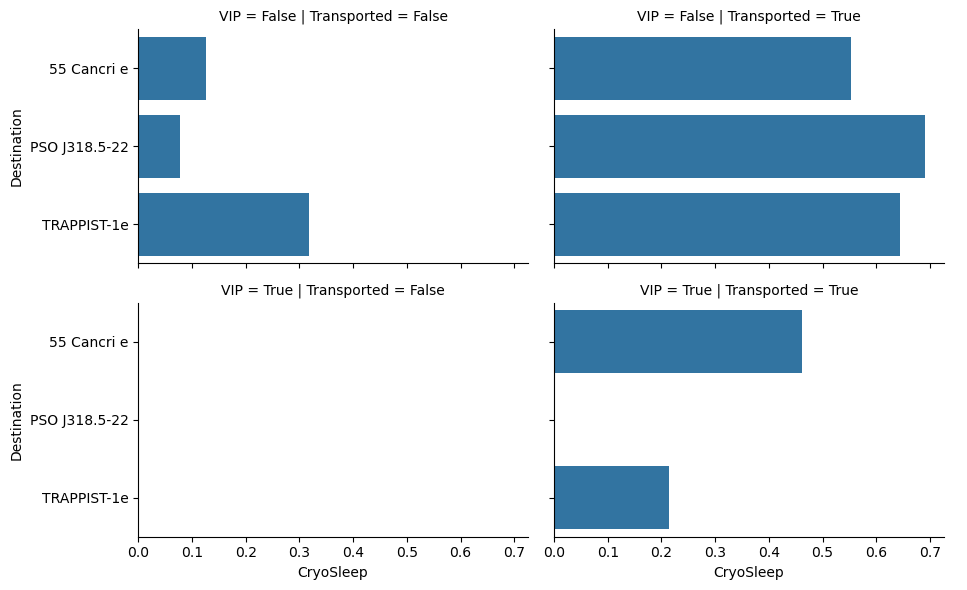

In [130]:
grid = sns.FacetGrid(train, row='VIP', col='Transported', aspect=1.6)
grid.map(sns.barplot, 'CryoSleep', 'Destination', ci=None)
grid.add_legend()   

In [131]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [132]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**상관계수 확인**

<AxesSubplot:>

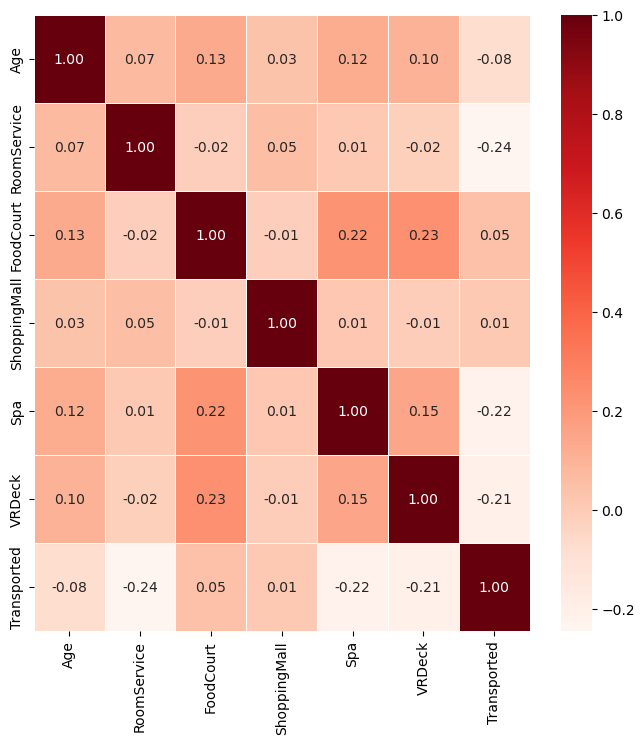

In [133]:
corr = train[['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, cmap='Reds')

In [134]:
train.sort_values('RoomService', ascending=False)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
4416,4690_02,Europa,False,NaN,TRAPPIST-1e,27.0,False,14327.0,1487.0,0.0,1.0,0.0,Tope Dishocatal,False
5105,5455_01,Mars,False,E/344/P,55 Cancri e,13.0,False,9920.0,0.0,180.0,130.0,571.0,Varkes Nate,False
8626,9202_01,Europa,False,C/309/P,TRAPPIST-1e,26.0,False,8586.0,77.0,114.0,29.0,4.0,Alark Eguing,False
7933,8470_01,Europa,NaN,C/281/P,55 Cancri e,31.0,True,8243.0,280.0,0.0,3220.0,2285.0,Brafirk Aloubtled,False
7118,7585_02,Europa,False,C/281/S,TRAPPIST-1e,39.0,NaN,8209.0,18.0,432.0,3560.0,54.0,Azhasim Admingried,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8425,8998_02,Earth,False,E/591/S,TRAPPIST-1e,47.0,False,NaN,1.0,0.0,967.0,5.0,Jonaye Englence,False
8450,9026_01,Earth,True,G/1463/P,TRAPPIST-1e,58.0,False,NaN,0.0,0.0,0.0,0.0,Mathy Boyers,True
8525,9101_01,Earth,False,F/1865/P,TRAPPIST-1e,21.0,False,NaN,0.0,496.0,430.0,0.0,Gera Frazie,False
8534,9112_01,Mars,False,D/290/P,TRAPPIST-1e,28.0,False,NaN,0.0,0.0,0.0,0.0,Wealke Brin,False


In [135]:
train.groupby('RoomService').mean('Transported')

,Age,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
RoomService,,,,,,
0.0,27.543287,433.652254,105.080912,286.019210,284.484587,0.633315
1.0,31.145299,943.333333,257.241071,487.344828,679.017699,0.341880
2.0,31.760000,1387.243590,254.820513,538.526316,590.539474,0.405063
3.0,30.983333,717.016949,219.933333,757.688525,638.448276,0.393443
4.0,29.377778,673.822222,407.000000,600.391304,386.021739,0.191489
...,...,...,...,...,...,...
8209.0,39.000000,18.000000,432.000000,3560.000000,54.000000,0.000000
8243.0,31.000000,280.000000,0.000000,3220.000000,2285.000000,0.000000
8586.0,26.000000,77.000000,114.000000,29.000000,4.000000,0.000000


In [136]:
# train['Age_group']=np.nan
# train.loc[train['Age']<=12,'Age_group']='12'
# train.loc[(train['Age']>12) & (train['Age']<18),'Age_group']='17'
# train.loc[(train['Age']>=18) & (train['Age']<=25),'Age_group']='25'
# train.loc[(train['Age']>25) & (train['Age']<=30),'Age_group']='30'
# train.loc[(train['Age']>30) & (train['Age']<=50),'Age_group']='50'
# train.loc[train['Age']>50,'Age_group']='51'

# test['Age_group']=np.nan
# test.loc[test['Age']<=12,'Age_group']='12'
# test.loc[(test['Age']>12) & (test['Age']<18),'Age_group']='17'
# test.loc[(test['Age']>=18) & (test['Age']<=25),'Age_group']='25'
# test.loc[(test['Age']>25) & (test['Age']<=30),'Age_group']='30'
# test.loc[(test['Age']>30) & (test['Age']<=50),'Age_group']='50'
# test.loc[test['Age']>50,'Age_group']='51'

# plt.figure(figsize=(10,4))
# g=sns.countplot(data=train, x='Age_group', hue='Transported', order=['12','17','25','30','50','51'])
# plt.title('Age group distribution') 

Text(0.5, 1.0, 'No spending indicator')

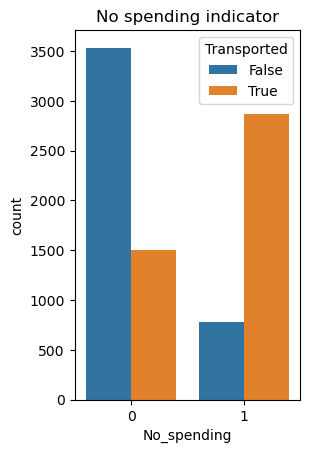

In [137]:
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

train['Expenditure']=train[exp_feats].sum(axis=1)
train['No_spending']=(train['Expenditure']==0).astype(int)

test['Expenditure']=test[exp_feats].sum(axis=1)
test['No_spending']=(test['Expenditure']==0).astype(int)

plt.subplot(1,2,2)
sns.countplot(data=train, x='No_spending', hue='Transported')
plt.title('No spending indicator')
#fig.tight_layout()

In [138]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Expenditure,No_spending
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,0


##  데이터 전처리

**타깃 값에 필요없는 컬럼 드랍(승객id와 이름)**

In [139]:
train.drop(['PassengerId', 'Name'], axis = 1, inplace = True)
test.drop(['PassengerId','Name'],axis=1, inplace = True)

**Cabin은 (deck/num/side)가 합쳐진 값이다. side → Port=P(좌현), Starboard=S(우현)
deck,num,side의 각각의 값을 세분화 한뒤 cabin값은 삭제한다**

**cabin 세분화**

In [140]:
train[['deck', 'num','side']] = train['Cabin'].str.split('/', expand=True)
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Expenditure,No_spending,deck,num,side
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,1,B,0,P
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,736.0,0,F,0,S
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,10383.0,0,A,0,S
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,5176.0,0,A,0,S
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1091.0,0,F,1,S


In [141]:
test[['deck', 'num','side']] = test['Cabin'].str.split('/', expand=True)
test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Expenditure,No_spending,deck,num,side
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,0.0,1,G,3,S
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,2832.0,0,F,4,S
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,0.0,1,C,0,S
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,7418.0,0,C,1,S
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,645.0,0,F,5,S


**이미 값을 추출한 cabin 삭제**

In [142]:
train=train.drop(['Cabin'],axis=1)
test=test.drop(['Cabin'],axis=1)

In [143]:
train['deck'].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: deck, dtype: int64

**deck 확인및 변환**

In [144]:
train['deck']=train['deck'].replace({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'T':7})
train['deck'].value_counts()

5.0    2794
6.0    2559
4.0     876
1.0     779
2.0     747
3.0     478
0.0     256
7.0       5
Name: deck, dtype: int64

In [145]:
test['deck']=test['deck'].replace({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'T':7})
test['deck'].value_counts()

5.0    1445
6.0    1222
4.0     447
1.0     362
2.0     355
3.0     242
0.0      98
7.0       6
Name: deck, dtype: int64

**side 확인및 변환**

In [146]:
train['side'].unique().tolist()

['P', 'S', nan]

In [147]:
train['side']=train['side'].replace({'P':0, 'S':1})
train['side'].value_counts()

1.0    4288
0.0    4206
Name: side, dtype: int64

In [148]:
test['side']=test['deck'].replace({'P':0, 'S':1})
test['side'].value_counts()

5.0    1445
6.0    1222
4.0     447
1.0     362
2.0     355
3.0     242
0.0      98
7.0       6
Name: side, dtype: int64

In [149]:
train['side'].unique().tolist()

[0.0, 1.0, nan]

In [150]:
train['side'].unique().tolist()

[0.0, 1.0, nan]

**HomePlanet 변환**

In [151]:
train['HomePlanet'].unique().tolist()

['Europa', 'Earth', 'Mars', nan]

In [152]:
train['HomePlanet']=train['HomePlanet'].replace({'Europa':0, 'Earth':1, 'Mars':1})
train['HomePlanet'].value_counts()

1.0    6361
0.0    2131
Name: HomePlanet, dtype: int64

In [153]:
test['HomePlanet']=test['HomePlanet'].replace({'Europa':0, 'Earth':1, 'Mars':1})
test['HomePlanet'].value_counts()

1.0    3188
0.0    1002
Name: HomePlanet, dtype: int64

**Destination 변환**

In [154]:
train['Destination'].unique().tolist()

['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan]

In [155]:
train['Destination']=train['Destination'].replace({'TRAPPIST-1e':0, 'PSO J318.5-22':1, '55 Cancri e':2})
train['Destination'].value_counts()

0.0    5915
2.0    1800
1.0     796
Name: Destination, dtype: int64

In [156]:
test['Destination']=test['Destination'].replace({'TRAPPIST-1e':0, 'PSO J318.5-22':1, '55 Cancri e':2})
test['Destination'].value_counts()

0.0    2956
2.0     841
1.0     388
Name: Destination, dtype: int64

**나머지 범주형 데이터들인 CryoSleep, VIP, Transported 변환**

In [157]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Expenditure,No_spending,deck,num,side
0,0.0,False,0.0,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,1,1.0,0,0.0
1,1.0,False,0.0,24.0,False,109.0,9.0,25.0,549.0,44.0,True,736.0,0,5.0,0,1.0
2,0.0,False,0.0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,10383.0,0,0.0,0,1.0
3,0.0,False,0.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,5176.0,0,0.0,0,1.0
4,1.0,False,0.0,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1091.0,0,5.0,1,1.0


In [158]:
train[['CryoSleep', 'VIP','Transported']] = (train[['CryoSleep', 'VIP','Transported']] == True).astype(int)
test[['CryoSleep', 'VIP']] = (test[['CryoSleep', 'VIP']] == True).astype(int)
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Expenditure,No_spending,deck,num,side
0,0.0,0,0.0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1,1.0,0,0.0
1,1.0,0,0.0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,736.0,0,5.0,0,1.0
2,0.0,0,0.0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,10383.0,0,0.0,0,1.0
3,0.0,0,0.0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,5176.0,0,0.0,0,1.0
4,1.0,0,0.0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1091.0,0,5.0,1,1.0


**결측치 확인**

In [159]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
ShoppingMall,208
HomePlanet,201
deck,199
num,199
side,199
VRDeck,188
FoodCourt,183
Spa,183
Destination,182


In [160]:
train = train.select_dtypes(include=[np.number]).interpolate().dropna()
test = test.select_dtypes(include=[np.number]).interpolate().dropna()

sum(train.isnull().sum() != 0)

0

In [161]:
# train['CryoSleep'] = train['CryoSleep'].fillna(0)
# train['VIP'] = train['VIP'].fillna(0)
# train['HomePlanet'] = train['HomePlanet'].fillna(train['HomePlanet'].mode()[0])
# train['Destination'] = train['Destination'].fillna(train['Destination'].mode()[0])
# train['ShoppingMall'] = train['ShoppingMall'].fillna(train['ShoppingMall'].median())
# train['VRDeck'] = train['VRDeck'].fillna(train['VRDeck'].median())
# train['deck'] = train['deck'].fillna(train['deck'].median())
# train['num'] = train['num'].fillna(train['num'].mode()[0])
# train['side'] = train['side'].fillna(train['side'].median())
# train['FoodCourt'] = train['FoodCourt'].fillna(train['FoodCourt'].median())
# train['Spa'] = train['Spa'].fillna(train['Spa'].median())
# train['RoomService'] = train['RoomService'].fillna(train['RoomService'].median())
# train['Age'] = train['Age'].fillna(train['Age'].median())

In [162]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
HomePlanet,0
CryoSleep,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0


In [166]:
train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Expenditure,No_spending,deck,side
0,0.0,0,0.0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1,1.0,0.0
1,1.0,0,0.0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,736.0,0,5.0,1.0
2,0.0,0,0.0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,10383.0,0,0.0,1.0
3,0.0,0,0.0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,5176.0,0,0.0,1.0
4,1.0,0,0.0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1091.0,0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,0,2.0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,8536.0,0,0.0,0.0
8689,1.0,1,1.0,18.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1,6.0,1.0
8690,1.0,0,0.0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,1873.0,0,6.0,1.0
8691,0.0,0,2.0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,4637.0,0,4.0,1.0


# -----------------------------------------------------------------------

In [163]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(max_iter=1000, random_state=42)
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
from sklearn.model_selection import cross_val_score

In [164]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(max_iter=1000, random_state=42)

In [165]:
log_clf_scores = cross_val_score(log_clf, X_train, Y_train, cv=3)
log_clf_scores.mean()

NameError: name 'X_train' is not defined

In [ ]:
knn_clf_scores = cross_val_score(knn_clf, X_train, Y_train, cv=3) 
knn_clf_scores.mean()

In [ ]:
X_train_mm = X_train.apply(minmax_normalize)
X_train_mm.min(), X_train_mm.max()

In [ ]:
X_train_std = X_train.apply(zscore_standize)
X_train_std.mean(), X_train_std.std()

In [ ]:
log_clf = LogisticRegression(max_iter=1000, random_state=42)
log_clf_scores = cross_val_score(log_clf, X_train_mm, Y_train, cv=3)
log_clf_scores.mean()

In [ ]:
log_clf = LogisticRegression(max_iter=1000, random_state=42)
log_clf_scores = cross_val_score(log_clf, X_train_mm, Y_train, cv=3)
log_clf_scores.mean()

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf_scores = cross_val_score(knn_clf, X_train_mm, Y_train, cv=3) 
knn_clf_scores.mean()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
forest_scores = cross_val_score(forest_clf, X_train, Y_train, cv=5)
forest_scores.mean()

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, Y_train)
X_pred = tree_clf.predict(X_test)
accuracy_score(X_test, X_pred)

In [ ]:
countplotcountplot

----------------------------------------------------#(카피한거)

In [ ]:
# X_train = train.drop("Transported", axis=1)
# Y_train = train["Transported"]
# X_test  = test
# X_train.shape, Y_train.shape, X_test.shape

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC, LinearSVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.linear_model import Perceptron
# from sklearn.linear_model import SGDClassifier
# from sklearn.tree import DecisionTreeClassifier


In [ ]:
# logreg = LogisticRegression()
# logreg.fit(X_train, Y_train)
# Y_pred = logreg.predict(X_test)
# acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
# acc_log

In [ ]:
# svc = SVC()
# svc.fit(X_train, Y_train)
# Y_pred = svc.predict(X_test)
# acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
# acc_svc

In [ ]:
# knn = KNeighborsClassifier(n_neighbors = 3)
# knn.fit(X_train, Y_train)
# Y_pred = knn.predict(X_test)
# acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
# acc_knn

In [ ]:
# decision_tree = DecisionTreeClassifier()
# decision_tree.fit(X_train, Y_train)
# Y_pred = decision_tree.predict(X_test)
# acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
# acc_decision_tree

In [ ]:
# random_forest = RandomForestClassifier(n_estimators=100)
# random_forest.fit(X_train, Y_train)
# Y_pred = random_forest.predict(X_test)
# random_forest.score(X_train, Y_train)
# acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
# acc_random_forest